In [28]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from mesa_reader import MesaData

sb.set(style='whitegrid', context='talk', palette='Set1')
plt.rcParams["font.family"] = "serif"

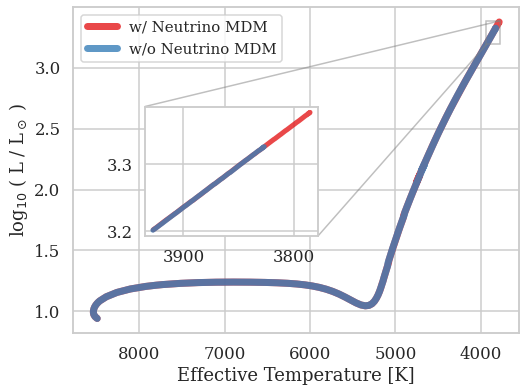

In [117]:
idx = 98
end = [298, 200]

data = glob.glob('*.data')
fig, ax = plt.subplots(figsize=(8,6))
ax2 = plt.axes([.25, .35, .3, .3])
labels = ['w/ Neutrino MDM', 'w/o Neutrino MDM']
for d, L, e in zip(data, labels, end):
    m = MesaData(d)
    ax.plot(m.effective_T[idx:], m.log_L[idx:], label=L, alpha=0.8, lw=7)
    
    # Plot just the tip
    ax2.plot(m.effective_T[len(m.effective_T)-e:], 
             m.log_L[len(m.effective_T)-e:],
            alpha=0.8, lw=5)

    
ax.set_xlabel('Effective Temperature [K]')
ax.set_ylabel(r'log$_{10}$ ( L / L$_\odot$ )')
ax.invert_xaxis()
ax2.invert_xaxis()
ax.indicate_inset_zoom(ax2)
ax2.set_xticklabels([])
#ax2.set_yticklabels([])
ax.legend(loc='upper left', prop={'size': 15}); # loc=(0.05, 0.8)
fig.savefig('zoomIn_compare.jpeg', transparent=False, bbox_inches='tight')